# فصل دوم-آزمون شماره 1
### سوال اول:
سیگنال گسسته زمان زیر را بر حسب سیگنال ضربه بنویسید.

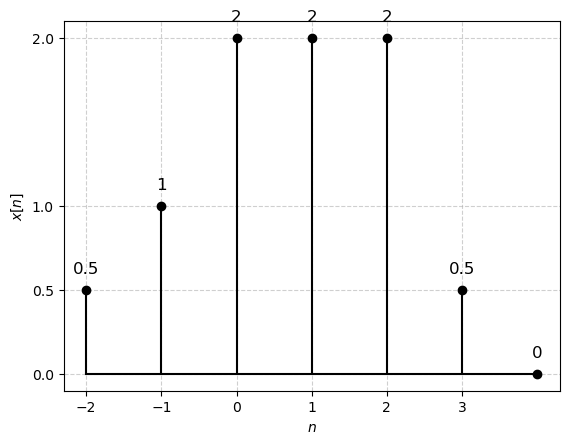

In [5]:
import matplotlib.pyplot as plt

# مقادیر محور افقی (n)
n = [-2, -1, 0, 1, 2, 3, 4]

# مقادیر سیگنال در هر مقدار n
x = [1/2, 1, 2, 2, 2, 1/2, 0]

# رسم نمودار سیگنال گسسته
fig, ax = plt.subplots()
ax.stem(n, x, linefmt='k-', markerfmt='ko', basefmt='k-')

# نمایش مقادیر روی نقاط
for i in range(len(n)):
    ax.text(n[i], x[i] + 0.1, str(x[i]), ha='center', fontsize=12)

# تنظیمات نمودار
ax.set_xticks(range(-2, 4))  # تنظیم مقادیر محور افقی
ax.set_yticks([0, 0.5, 1, 2])  # تنظیم مقادیر محور عمودی
ax.set_xlabel('$n$')
ax.set_ylabel('$x[n]$')
ax.grid(True, linestyle='--', alpha=0.6)

# نمایش نمودار
plt.show()


### پاسخ:

$$ x[n] = 1/2\delta[n+2]+\delta[n+1]+2\delta[n]+2\delta[n-1]+2\delta[n-2]+1/2\delta[n-3] $$

در حالت کلی هر سیگنال $ x[n] $ را میتوان بصورت جمع وزندار تابع ضربه و شیفت یافته‌های آن بصورت زیر نوشت:

$$ x[n] = \sum_{k=-\infty}^{\infty} x[k]\;\delta[n-k] $$

### سوال دوم:
پاسخ سیستم $ LTI $ زیر را با پاسخ ضربه $ h[n] $ به ورودی $ x[n] $ بدست آورید.

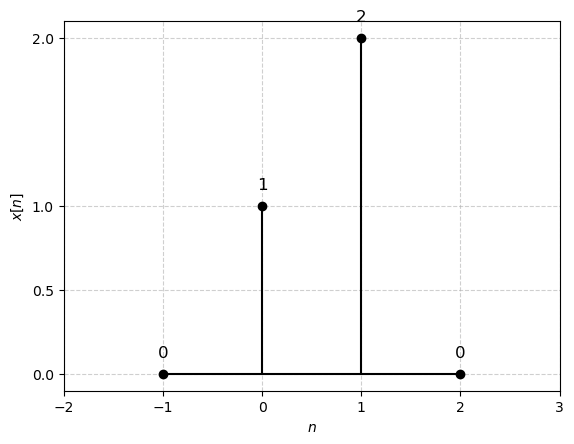

In [12]:
import matplotlib.pyplot as plt

# مقادیر محور افقی (n)
n = [-1, 0, 1, 2]

# مقادیر سیگنال در هر مقدار n
x = [0, 1, 2, 0]

# رسم نمودار سیگنال گسسته
fig, ax = plt.subplots()
ax.stem(n, x, linefmt='k-', markerfmt='ko', basefmt='k-')

# نمایش مقادیر روی نقاط
for i in range(len(n)):
    ax.text(n[i], x[i] + 0.1, str(x[i]), ha='center', fontsize=12)

# تنظیمات نمودار
ax.set_xticks(range(-2, 4))  # تنظیم مقادیر محور افقی
ax.set_yticks([0, 0.5, 1, 2])  # تنظیم مقادیر محور عمودی
ax.set_xlabel('$n$')
ax.set_ylabel('$x[n]$')
ax.grid(True, linestyle='--', alpha=0.6)

# نمایش نمودار
plt.show()


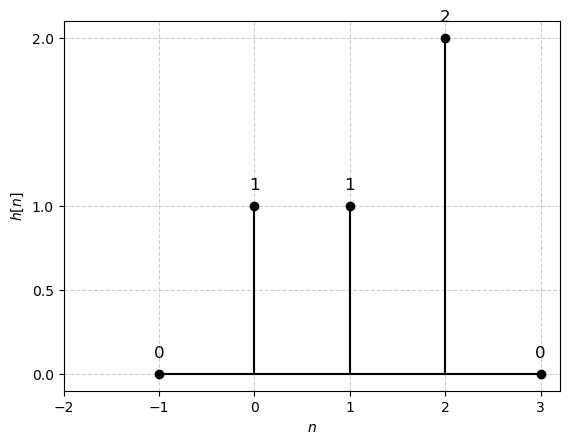

In [16]:
import matplotlib.pyplot as plt

# مقادیر محور افقی (n)
n = [-1, 0, 1, 2, 3]

# مقادیر سیگنال در هر مقدار n
x = [0, 1, 1, 2, 0]

# رسم نمودار سیگنال گسسته
fig, ax = plt.subplots()
ax.stem(n, x, linefmt='k-', markerfmt='ko', basefmt='k-')

# نمایش مقادیر روی نقاط
for i in range(len(n)):
    ax.text(n[i], x[i] + 0.1, str(x[i]), ha='center', fontsize=12)

# تنظیمات نمودار
ax.set_xticks(range(-2, 4))  # تنظیم مقادیر محور افقی
ax.set_yticks([0, 0.5, 1, 2])  # تنظیم مقادیر محور عمودی
ax.set_xlabel('$n$')
ax.set_ylabel('$h[n]$')
ax.grid(True, linestyle='--', alpha=0.6)

# نمایش نمودار
plt.show()


### پاسخ:
**روش اول:** جمع وزن دار $ h[n-k] $ به تعداد $ x[k] $های مخالف صفر

$$ y[n] = \sum_{k=-\infty}^{\infty} x[k]\;h[n-k] = x[0]\;h[n] + x[1]\;h[n-1] = h[n] + 2h[n-1] $$

یعنی $ h[n] $ را با دو برابر $ h[n-1] $ جمع میکنیم.(شکل زیر)

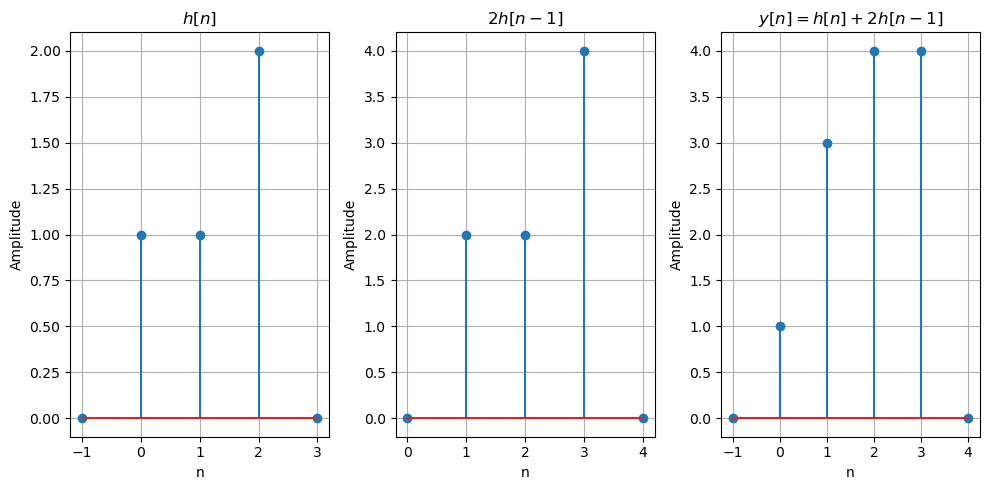

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def plot_stem(n, x, title, subplot):
    plt.subplot(subplot)
    plt.stem(n, x)
    plt.xlabel('n')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.grid()
    plt.xticks(n)

# تعریف h[n]
n = np.array([-1, 0, 1, 2, 3])
h = np.array([0, 1, 1, 2, 0])

# تعریف 2h[n-1]
n_shifted = n + 1
h_shifted = 2 * h

# محاسبه y[n] = h[n] + 2h[n-1]
n_combined = np.union1d(n, n_shifted)
y = np.zeros_like(n_combined, dtype=float)

for i, val in enumerate(n):
    y[np.where(n_combined == val)] += h[i]
for i, val in enumerate(n_shifted):
    y[np.where(n_combined == val)] += h_shifted[i]

# رسم نمودارها
plt.figure(figsize=(10, 5))
plot_stem(n, h, "$h[n]$", 131)
plot_stem(n_shifted, h_shifted, "$2h[n-1]$", 132)
plot_stem(n_combined, y, "$y[n] = h[n] + 2h[n-1]$", 133)

plt.tight_layout()
plt.show()

**روش دوم:** به ازای $ n $های مختلف بررسی میکنیم که چه بخشی از $ x[k] $ با $ h[n-k] $ همپوشانی دارد. نمونه‌های متناظر درهم ضرب شده و حاصل‌ها باهم جمع میگردند.

$$ n \leq -1 \rightarrow y[n] = 0 $$
$$ n = 0 \rightarrow y[0] = \sum_{k=-\infty}^{\infty} x[k]\;h[0-k] = 1 $$
$$ n = 1 \rightarrow y[1] = \sum_{k=-\infty}^{\infty} x[k]\;h[1-k] = 3 $$
$$ n = 2 \rightarrow y[2] = \sum_{k=-\infty}^{\infty} x[k]\;h[2-k] = 4 $$
$$ n = 3 \rightarrow y[3] = \sum_{k=-\infty}^{\infty} x[k]\;h[3-k] = 4 $$
$$ n \geq 4 \rightarrow y[n] = 0 $$

### سوال سوم:
پاسخ ضربه‌ی سیستم (بافرض آرامش اولیه) را بیابید.

$$ y[n] - \frac{1}{3} y[n-1] = x[n] $$
$$ h[n] = ?  $$
$$ x[n] = \delta[n] $$

شرایط سکون اولیه: \; $ x[n] = 0\; ;n \leq -1 \rightarrow y[-1] = 0 $

### پاسخ:

$$ n = 0 \rightarrow y[0]- \frac{1}{3}y[-1] = x[0] = \delta[0] \rightarrow y[0] = 1 $$
$$ n = 1 \rightarrow y[1]- \frac{1}{3}y[0] = x[1] \rightarrow y[1] = \frac{1}{3} $$
$$ n = 2 \rightarrow y[2]- \frac{1}{3} y[1] = x[2] \rightarrow y[2] = (\frac{1}{3})^2 $$

در نتیجه:
$$ y[n] = h[n] = (\frac{1}{3})^n \; \; ; n \geq 0 $$

تعداد جملات پاسخ ضربه نامحدود است.

### سوال چهارم:
پاسخ پله واحد یک سیستم با پاسخ ضربه $ h(t) $ چیست؟

### پاسخ:

$$ y_u (t) = \int_{-\infty}^{\infty} u(\tau)\;h(t-\tau)\;d\tau = \int_{-\infty}^{t}h(u)\;du $$

پس پاسخ پله واحد برای سیستم فوق، انتگرال پاسخ ضربه واحد است.

### سوال پنجم:
فرض کنید در مثال قبل ورودی $ e^{j\omega_0t} $ باشد. پاسخ پله واحد را برای این سیستم با این ورودی بدست آورید.

### پاسخ:

$$ y_exp (t) = \int_{-\infty}^{\infty} e^{j\omega_0t}\;h(t-\tau)\;d\tau = \int_{-\infty}^{\infty} e^{j\omega_0(t-u)}\;h(u)\;du = e^{j\omega_0t} \int_{-\infty}^{\infty} h(u)\; e^{-j\omega_0u}\;du $$